In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


torch.Size([3, 28, 28])


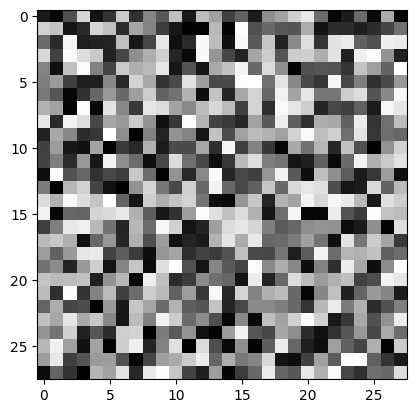

In [9]:
import matplotlib.pyplot as plt

input_image = torch.rand(3, 28, 28)
print(input_image.size())
plt.imshow(input_image[0, :, :], cmap='gray')

In [13]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size(), flat_image)

torch.Size([3, 784]) tensor([[0.1010, 0.0300, 0.3150,  ..., 0.4345, 0.4179, 0.8607],
        [0.2832, 0.6895, 0.1582,  ..., 0.3194, 0.2040, 0.7820],
        [0.8064, 0.1672, 0.5325,  ..., 0.8141, 0.1619, 0.1729]])


In [12]:
layer1 = nn.Linear(in_features=28*28, out_features=20) 
hidden1 = layer1(flat_image)
print(hidden1.size(), hidden1)

torch.Size([3, 20]) tensor([[ 0.2633, -0.4648,  0.0013, -0.7757, -0.2248,  0.0836,  0.1775, -0.0936,
          0.6921,  0.3516, -0.0666,  0.0871, -0.2965, -0.5113,  0.2562,  0.1515,
         -0.0175,  0.0323,  0.4655,  0.0948],
        [ 0.0728, -0.7824,  0.3403, -0.4899, -0.1005,  0.0775,  0.4241, -0.1651,
          0.6014,  0.1897, -0.0153,  0.4095, -0.3556, -0.2590,  0.2376,  0.1188,
          0.2663, -0.1493,  0.2828,  0.3946],
        [ 0.1054, -0.6291,  0.2377, -0.4085, -0.2171, -0.3266,  0.3551, -0.0621,
          0.6405,  0.2517,  0.1764,  0.1599, -0.3382, -0.4216, -0.0485, -0.1799,
          0.2346, -0.1888,  0.5749, -0.0651]], grad_fn=<AddmmBackward0>)


In [14]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2633, -0.4648,  0.0013, -0.7757, -0.2248,  0.0836,  0.1775, -0.0936,
          0.6921,  0.3516, -0.0666,  0.0871, -0.2965, -0.5113,  0.2562,  0.1515,
         -0.0175,  0.0323,  0.4655,  0.0948],
        [ 0.0728, -0.7824,  0.3403, -0.4899, -0.1005,  0.0775,  0.4241, -0.1651,
          0.6014,  0.1897, -0.0153,  0.4095, -0.3556, -0.2590,  0.2376,  0.1188,
          0.2663, -0.1493,  0.2828,  0.3946],
        [ 0.1054, -0.6291,  0.2377, -0.4085, -0.2171, -0.3266,  0.3551, -0.0621,
          0.6405,  0.2517,  0.1764,  0.1599, -0.3382, -0.4216, -0.0485, -0.1799,
          0.2346, -0.1888,  0.5749, -0.0651]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2633, 0.0000, 0.0013, 0.0000, 0.0000, 0.0836, 0.1775, 0.0000, 0.6921,
         0.3516, 0.0000, 0.0871, 0.0000, 0.0000, 0.2562, 0.1515, 0.0000, 0.0323,
         0.4655, 0.0948],
        [0.0728, 0.0000, 0.3403, 0.0000, 0.0000, 0.0775, 0.4241, 0.0000, 0.6014,
         0.1897, 0.0000, 0.4095, 0.0000, 0.0000, 0.23

In [15]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)
print(logits)

tensor([[ 0.3387, -0.3570, -0.2548, -0.0876, -0.3919, -0.0670, -0.0455, -0.2563,
          0.1761,  0.0988],
        [ 0.3665, -0.3286, -0.2069, -0.1723, -0.4744, -0.1505, -0.0468, -0.2555,
          0.0649,  0.0806],
        [ 0.2289, -0.3041, -0.2625, -0.1815, -0.2587,  0.0505, -0.1168, -0.1929,
          0.1288, -0.0783]], grad_fn=<AddmmBackward0>)


In [16]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [17]:
pred_probab

tensor([[0.1488, 0.0742, 0.0822, 0.0971, 0.0717, 0.0992, 0.1013, 0.0821, 0.1264,
         0.1170],
        [0.1572, 0.0784, 0.0886, 0.0917, 0.0678, 0.0937, 0.1040, 0.0844, 0.1162,
         0.1181],
        [0.1367, 0.0802, 0.0836, 0.0907, 0.0839, 0.1143, 0.0967, 0.0896, 0.1237,
         0.1005]], grad_fn=<SoftmaxBackward0>)

In [18]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0242, -0.0156,  0.0078,  ...,  0.0174,  0.0189,  0.0299],
        [ 0.0204,  0.0184,  0.0304,  ..., -0.0325,  0.0073,  0.0113]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0254, -0.0139], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0037,  0.0215, -0.0074,  ...,  0.0425, -0.0234,  0.0124],
        [ 0.0300,  0.0126,  0.0299,  ..., -0.0105, -0.0090,  0.0021]],
       device='cuda:0', grad_fn=<Sl

# Optimizing model parameters

In [19]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 7557698.98it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 155937.70it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2711459.75it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5116653.32it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



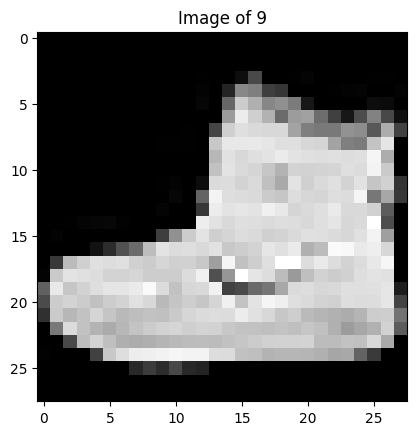

In [36]:
import matplotlib.pyplot as plt

# get first image in the training set
plt.figure()
plt.imshow(training_data[0][0].reshape(28, 28), cmap='gray')
plt.title('Image of {}'.format(training_data[0][1]))
plt.show()

In [52]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [47]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [49]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [55]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == 1).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct): >0.1f}%, Avg loss: {test_loss:>8f} \n")

In [56]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1} \n---------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1 
---------------------
loss: 2.185640 [    0/60000]
loss: 2.179502 [ 6400/60000]
loss: 2.125562 [12800/60000]
loss: 2.140673 [19200/60000]
loss: 2.106235 [25600/60000]
loss: 2.036454 [32000/60000]
loss: 2.067047 [38400/60000]
loss: 1.999986 [44800/60000]
loss: 2.015236 [51200/60000]
loss: 1.932488 [57600/60000]
Test Error: 
 Accuracy: 9.8%, Avg loss: 1.940173 

Epoch 2 
---------------------
loss: 1.973414 [    0/60000]
loss: 1.949384 [ 6400/60000]
loss: 1.841344 [12800/60000]
loss: 1.870465 [19200/60000]
loss: 1.783064 [25600/60000]
loss: 1.715612 [32000/60000]
loss: 1.734989 [38400/60000]
loss: 1.643536 [44800/60000]
loss: 1.673274 [51200/60000]
loss: 1.548985 [57600/60000]
Test Error: 
 Accuracy: 12.2%, Avg loss: 1.578251 

Epoch 3 
---------------------
loss: 1.646021 [    0/60000]
loss: 1.611748 [ 6400/60000]
loss: 1.464522 [12800/60000]
loss: 1.518940 [19200/60000]
loss: 1.413867 [25600/60000]
loss: 1.398170 [32000/60000]
loss: 1.404699 [38400/60000]
loss: 1.332219 [44800